#📰 News Analysis

###In this project, we aim to broadly predict what each news article is about.

###We’re analyzing a dataset of 7,600 news articles, which includes 1,900 articles across four categories: sports, science and technology (sci/tech), business, and world.

###Our goal is to predict whether business or world news articles carry a positive or negative tone. For sports news, we’ll classify whether the article reports match results or discusses general sports topics. For sci/tech news, we want to determine whether the article is related to artificial intelligence or covers another subject.

###Below is a brief overview of how we’ll approach the project. As we progress, we’ll describe each step in detail to make the work as clear and practical as possible.

###First, we’ll load and import all the necessary libraries for the project, such as sklearn, nltk, spacy, pandas, among others.

###We’ll load the CSV file containing all the news articles and perform a brief exploratory data analysis.

###We’ll create a copy of the dataset to work more safely, avoiding any risk of data loss or incorrect manipulation.

###Next, we’ll begin the natural language processing phase, applying common techniques such as tokenization, converting all characters to lowercase, lemmatization, stemming, removing stopwords, and eliminating punctuation marks.

###Finally, we’ll move on to prediction and deep learning. Using classification models like RandomForest or LogisticRegression, along with techniques such as TF-IDF or Bag of Words, we’ll train models to accurately predict the content of each article.

###At the end, we’ll present a final conclusion summarizing the project and the results obtained.




In [ ]:
# We import the necessary libraries along with their required modules.

import pandas as pd
import numpy as np
import spacy
import re
from spacy import displacy
import nltk
import gdown
import chardet
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from transformers import pipeline
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# We load a CSV file that contains the database we’ll be working with.

pd.set_option('display.max_colwidth', None)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('test.csv')

Saving test.csv to test.csv


##EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
1,4,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,4,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,4,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar."
4,4,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."


In [ ]:
df.sample(5)

,Class Index,Title,Description
4060,3,Kmart names new CEO,"Kmart yesterday hired a restaurant and branding expert as its new president and chief executive officer, suggesting the nation #39;s third-largest discount retailer would soon start"
4971,1,Darfur peace talks inch forward despite deadlock over security,ABUJA (AFP) - African Union mediators met separately with Sudanese government envoys and the leaders of the uprising in the strife-torn region of Darfur in a bid to hammer out a deal on demilitarising the conflict.
3623,4,SGI to Ship Intel Linux Workstation (Ziff Davis),Ziff Davis - Silicon Graphics Inc. will ship a new ultra high performance Intel Itanium-based Linux workstation designed for scientific and medical applications.
4905,2,New memories warm heart of this Bosox fan,Is it really true? Did it really happen? Or was that just the figment of some Boston Red Sox fanatic #39;s wild imagination? Did the Red Sox really win the World Series for the first time since 1918 by sweeping the St.
5639,4,Microsoft Takes Lead in PDA Software,"Microsoft Corp.'s software platform for personal digital assistants took over the market lead from PalmSource Inc. for the first time in the third quarter, according to market research released Friday."


In [ ]:
df.tail()

,Class Index,Title,Description
7595,1,Around the world,"Ukrainian presidential candidate Viktor Yushchenko was poisoned with the most harmful known dioxin, which is contained in Agent Orange, a scientist who analyzed his blood said Friday."
7596,2,Void is filled with Clement,"With the supply of attractive pitching options dwindling daily -- they lost Pedro Martinez to the Mets, missed on Tim Hudson, and are resigned to Randy Johnson becoming a Yankee -- the Red Sox struck again last night, coming to terms with free agent Matt Clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ..."
7597,2,Martinez leaves bitter,"Like Roger Clemens did almost exactly eight years earlier, Pedro Martinez has left the Red Sox apparently bitter about the way he was treated by management."
7598,3,5 of arthritis patients in Singapore take Bextra or Celebrex &lt;b&gt;...&lt;/b&gt;,SINGAPORE : Doctors in the United States have warned that painkillers Bextra and Celebrex may be linked to major cardiovascular problems and should not be prescribed.
7599,3,EBay gets into rentals,"EBay plans to buy the apartment and home rental service Rent.com for \$415 million, adding to its already exhaustive breadth of offerings."


In [ ]:
df.shape

(7600, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [ ]:
df.describe()

,Class Index
count,7600.000000
mean,2.500000
std,1.118108
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
df.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Class Index,int64
Title,object
Description,object


In [ ]:
# We add a new column called category to better distinguish the class index column.

mapa_categoria = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}
df['Category'] = df['Class Index'].map(mapa_categoria)
display(df)

,Class Index,Title,Description,Category
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.,Business
1,4,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.",Sci/Tech
2,4,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.",Sci/Tech
3,4,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.",Sci/Tech
4,4,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.",Sci/Tech
...,...,...,...,...
7595,1,Around the world,"Ukrainian presidential candidate Viktor Yushchenko was poisoned with the most harmful known dioxin, which is contained in Agent Orange, a scientist who analyzed his blood said Friday.",World
7596,2,Void is filled with Clement,"With the supply of attractive pitching options dwindling daily -- they lost Pedro Martinez to the Mets, missed on Tim Hudson, and are resigned to Randy Johnson becoming a Yankee -- the Red Sox struck again last night, coming to terms with free agent Matt Clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...",Sports
7597,2,Martinez leaves bitter,"Like Roger Clemens did almost exactly eight years earlier, Pedro Martinez has left the Red Sox apparently bitter about the way he was treated by management.",Sports
7598,3,5 of arthritis patients in Singapore take Bextra or Celebrex &lt;b&gt;...&lt;/b&gt;,SINGAPORE : Doctors in the United States have warned that painkillers Bextra and Celebrex may be linked to major cardiovascular problems and should not be prescribed.,Business


In [ ]:
# Reorders the 'Categoria' column to appear immediately after 'Class Index' for better readability.

if 'Category' in df.columns and 'Class Index' in df.columns:
    cols = list(df.columns)
    cols.remove('Category')
    indice = cols.index('Class Index')
    cols.insert(indice + 1, 'Category')
    df = df[cols]
    display(df)
# If either column is missing, prints an error message.
else:
    print("Error: The columns 'Category' or 'Class Index' don't exists. ")

,Class Index,Category,Title,Description
0,3,Business,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
1,4,Sci/Tech,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,4,Sci/Tech,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,4,Sci/Tech,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar."
4,4,Sci/Tech,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."
...,...,...,...,...
7595,1,World,Around the world,"Ukrainian presidential candidate Viktor Yushchenko was poisoned with the most harmful known dioxin, which is contained in Agent Orange, a scientist who analyzed his blood said Friday."
7596,2,Sports,Void is filled with Clement,"With the supply of attractive pitching options dwindling daily -- they lost Pedro Martinez to the Mets, missed on Tim Hudson, and are resigned to Randy Johnson becoming a Yankee -- the Red Sox struck again last night, coming to terms with free agent Matt Clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ..."
7597,2,Sports,Martinez leaves bitter,"Like Roger Clemens did almost exactly eight years earlier, Pedro Martinez has left the Red Sox apparently bitter about the way he was treated by management."
7598,3,Business,5 of arthritis patients in Singapore take Bextra or Celebrex &lt;b&gt;...&lt;/b&gt;,SINGAPORE : Doctors in the United States have warned that painkillers Bextra and Celebrex may be linked to major cardiovascular problems and should not be prescribed.


In [ ]:
df['Description'].describe()

,Description
count,7600
unique,7594
top,"WASHINGTON (Reuters) - The U.S. economy slowed more sharply in the second quarter than first thought as oil prices rose and the trade gap swelled, the government said on Friday in a report that confirmed momentum faltered in the spring."
freq,2


In [ ]:
df['Category'].describe()

,Category
count,7600
unique,4
top,Business
freq,1900


In [ ]:
df['Category'].value_counts()

,count
Category,
Business,1900
Sci/Tech,1900
Sports,1900
World,1900


For this project We’ll analyze whether business and world news have a positive or negative tone.
For sports news, we’ll identify whether the article reports match results or discusses general sports topics.
For sci/tech news, we’ll determine whether the article is about technological advances related to artificial intelligence or another topic.

In [ ]:
# We create a copy of the DataFrame to work safely, avoiding data loss or unwanted transformations.

df1 = df.copy()

In [ ]:
 print(df1.loc[50,'Description'])
 print("\n"+"-"*80 + "\n")
 print(df.loc[1456, 'Description'])
 print("\n"+"-"*80 + "\n")
 print(df.loc[4580, 'Description'])
 print("\n"+"-"*80 + "\n")

AFP - A squadron of US Air Force F-15E fighters based in Alaska will fly to South Korea next month for temporary deployment aimed at enhancing US firepower on the Korean peninsula, US authorities said.

--------------------------------------------------------------------------------

Reuters - Alcoa Inc. , the world's largest\aluminum producer, on Thursday warned that third-quarter\results would fall far short of Wall Street expectations, hurt\by plant shutdowns, restructuring costs and weakness in some\markets.

--------------------------------------------------------------------------------

Hard on the heels of Microsoft announcing that it #39;s taken Live Communications Server 2005 gold, instant messaging management software vendors IMlogic and FaceTime on Tuesday both touted their support for the communication product.

--------------------------------------------------------------------------------



In [ ]:
# We merge the Title and Description columns to simplify natural language processing.

df1['full_text'] = df1['Title'] + ' ' + df1['Description']

In [ ]:
df1["full_text"] = df1["full_text"].str.replace(r'#39;s', '', regex=True)  # Remove #39
df1["full_text"] = df1["full_text"].str.replace(r'#39', '', regex=True)  # Remove #39
df1["full_text"] = df1["full_text"].str.replace(r'#39s', '', regex=True)  # Remove #39
df1["full_text"] = df1["full_text"].str.replace(r'#39;s', '', regex=True)  # Correct &#39;

In [ ]:
df1['full_text'].sample(10)

,full_text
4245,"NEC Unveils World Fastest Vector Supercomputer NEC Corporation has announced the worldwide launch and availability of the SX series model quot;SX-8, quot; the world most powerful vector supercomputer with a peak processing performance of a whopping 65 TFLOPS (trillion floating point operations per second)."
4032,"Hungary citizenship fails due to low turnout (AFP) AFP - Voters in Hungary failed to turn out in sufficient numbers to pass a referendum to extend citizenship to millions of ethnic Hungarians living in the region, a motion that split the country and drew fire from neighboring governments."
3774,Thais ;bomb ; south with paper birds on Muslim south Around 50 Thai Air Force planes quot;bombed quot; the largely Muslim south with paper birds on Sunday as a symbol of peace for the restive region where nearly 500 people have been killed since January.
5492,"Fed Raises Interest Rate A 4th Time, To 2 Percent The Federal Reserve suggested that it would continue to raise interest rates gradually through much of next year."
7173,ST Tele-TM Intl to buy 47.7 in Idea Mumbai: Singapore Technologies Telemedia and TM International have announced that their consortium has signed definitive agreements for the acquisition of 47.7 per cent stake in Idea Cellular.
26,Giddy Phelps Touches Gold for First Time Michael Phelps won the gold medal in the 400 individual medley and set a world record in a time of 4 minutes 8.26 seconds.
4405,"Arsenal boss Wenger has keeper worries Arsenal bounced back to winning ways with a comfortable 3-0 victory over struggling Birmingham City yesterday. A brace from Thierry Henry came after Robert Pires ; opener, but it was the shaky Premiership debut"
933,"Orion Debuts Cluster Workstation Orion Multisystems, a new company founded by former Transmeta (Quote, Chart) executives, debuted a family of workstations Monday that think and act like a cluster of servers."
706,"Bureaucracy Pins Rocket to Earth The da Vinci Project, a Toronto group planning to launch a homemade, manned spacecraft in October, is having trouble getting its paperwork off the ground. Canadian regulators are leery of approving the launch. And then there's the matter of finding insurance. By Dan Brekke."
5647,"Iran Says EU Nuke Negotiations in Final Stages TEHRAN (Reuters) - Iran's negotiations with the European Union over a deal which would spare Tehran from possible U.N. sanctions over its nuclear program are in their final stages, Iran said Saturday."


In [ ]:
# We convert all characters to lowercase.

df1['full_text_lower'] = df1['full_text'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [ ]:
df1

,Class Index,Category,Title,Description,full_text,full_text_lower
0,3,Business,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.,Fears for T N pension after talks Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.,fears for t n pension after talks unions representing workers at turner newall say they are disappointed after talks with stricken parent firm federal mogul
1,4,Sci/Tech,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.","The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.",the race is on second private team sets launch date for human spaceflight spacecom spacecom toronto canada a secondteam of rocketeers competing for the 3610 million ansari x prize a contest forprivately funded suborbital space flight has officially announced the firstlaunch date for its manned rocket
2,4,Sci/Tech,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.","Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.",ky company wins grant to study peptides ap ap a company founded by a chemistry researcher at the university of louisville won a grant to develop a method of producing better peptides which are short chains of amino acids the building blocks of proteins
3,4,Sci/Tech,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.","Prediction Unit Helps Forecast Wildfires (AP) AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.",prediction unit helps forecast wildfires ap ap its barely dawn when mike fitzpatrick starts his shift with a blur of colorful maps figures and endless charts but already he knows what the day will bring lightning will strike in places he expects winds will pick up moist places will dry and flames will roar
4,4,Sci/Tech,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.","Calif. Aims to Limit Farm-Related Smog (AP) AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.",calif aims to limit farmrelated smog ap ap southern californias smogfighting agency went after emissions of the bovine variety friday adopting the nations first rules to reduce air pollution from dairy cow manure
...,...,...,...,...,...,...
7595,1,World,Around th

In [ ]:
# We remove all punctuation characters.

def remove_punctuation(text):
  return re.sub(r'[^a-zA-Z0-9\s]', '', text)
df1['full_text_lower'] = df1['full_text_lower'].apply(remove_punctuation)

In [ ]:
# We tokenize the text.

df1['tokenized_text'] = df1['full_text_lower'].apply(word_tokenize)
df1['tokenized_text'].head()

,tokenized_text
0,"[fears, for, t, n, pension, after, talks, unions, representing, workers, at, turner, newall, say, they, are, disappointed, after, talks, with, stricken, parent, firm, federal, mogul]"
1,"[the, race, is, on, second, private, team, sets, launch, date, for, human, spaceflight, spacecom, spacecom, toronto, canada, a, secondteam, of, rocketeers, competing, for, the, 3610, million, ansari, x, prize, a, contest, forprivately, funded, suborbital, space, flight, has, officially, announced, the, firstlaunch, date, for, its, manned, rocket]"
2,"[ky, company, wins, grant, to, study, peptides, ap, ap, a, company, founded, by, a, chemistry, researcher, at, the, university, of, louisville, won, a, grant, to, develop, a, method, of, producing, better, peptides, which, are, short, chains, of, amino, acids, the, building, blocks, of, proteins]"
3,"[prediction, unit, helps, forecast, wildfires, ap, ap, its, barely, dawn, when, mike, fitzpatrick, starts, his, shift, with, a, blur, of, colorful, maps, figures, and, endless, charts, but, already, he, knows, what, the, day, will, bring, lightning, will, strike, in, places, he, expects, winds, will, pick, up, moist, places, will, dry, and, flames, will, roar]"
4,"[calif, aims, to, limit, farmrelated, smog, ap, ap, southern, californias, smogfighting, agency, went, after, emissions, of, the, bovine, variety, friday, adopting, the, nations, first, rules, to, reduce, air, pollution, from, dairy, cow, manure]"


In [ ]:
# We display a list of the 20 most common English words.

stopwords_eng = stopwords.words('english')
print(stopwords_eng[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [ ]:
#Remove the stopwords.

stop_words = set(stopwords.words('english'))
df1['tokenized_text_without_stopwords'] = df1['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df1['tokenized_text_without_stopwords'].head()

,tokenized_text_without_stopwords
0,"[fears, n, pension, talks, unions, representing, workers, turner, newall, say, disappointed, talks, stricken, parent, firm, federal, mogul]"
1,"[race, second, private, team, sets, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocketeers, competing, 3610, million, ansari, x, prize, contest, forprivately, funded, suborbital, space, flight, officially, announced, firstlaunch, date, manned, rocket]"
2,"[ky, company, wins, grant, study, peptides, ap, ap, company, founded, chemistry, researcher, university, louisville, grant, develop, method, producing, better, peptides, short, chains, amino, acids, building, blocks, proteins]"
3,"[prediction, unit, helps, forecast, wildfires, ap, ap, barely, dawn, mike, fitzpatrick, starts, shift, blur, colorful, maps, figures, endless, charts, already, knows, day, bring, lightning, strike, places, expects, winds, pick, moist, places, dry, flames, roar]"
4,"[calif, aims, limit, farmrelated, smog, ap, ap, southern, californias, smogfighting, agency, went, emissions, bovine, variety, friday, adopting, nations, first, rules, reduce, air, pollution, dairy, cow, manure]"


In [ ]:
# We apply stemming to reduce words to their approximate root form.

stemmer = PorterStemmer()
df1['stemming_text'] = df1['tokenized_text_without_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
df1['stemming_text'].head()

,stemming_text
0,"[fear, n, pension, talk, union, repres, worker, turner, newal, say, disappoint, talk, stricken, parent, firm, feder, mogul]"
1,"[race, second, privat, team, set, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocket, compet, 3610, million, ansari, x, prize, contest, forpriv, fund, suborbit, space, flight, offici, announc, firstlaunch, date, man, rocket]"
2,"[ky, compani, win, grant, studi, peptid, ap, ap, compani, found, chemistri, research, univers, louisvil, grant, develop, method, produc, better, peptid, short, chain, amino, acid, build, block, protein]"
3,"[predict, unit, help, forecast, wildfir, ap, ap, bare, dawn, mike, fitzpatrick, start, shift, blur, color, map, figur, endless, chart, alreadi, know, day, bring, lightn, strike, place, expect, wind, pick, moist, place, dri, flame, roar]"
4,"[calif, aim, limit, farmrel, smog, ap, ap, southern, california, smogfight, agenc, went, emiss, bovin, varieti, friday, adopt, nation, first, rule, reduc, air, pollut, dairi, cow, manur]"


In [ ]:
# We apply lemmatization to reduce words to their base form and identify their part of speech.

lemmatizer = WordNetLemmatizer()
def lemmatize_with_pos(tokens):
  pos_tags = pos_tag(tokens)
  lemmas = []
  for token, tag in pos_tags:
    pos = get_wordnet_pos(tag)
    lemma = lemmatizer.lemmatize(token, pos=pos) if pos else token
    lemmas.append(lemma)
  return lemmas

def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return 'a'
  elif treebank_tag.startswith('V'):
    return 'v'
  elif treebank_tag.startswith('N'):
    return 'n'
  elif treebank_tag.startswith('R'):
    return 'r'
  else:
    return None
df1['lemmatization_text'] = df1['tokenized_text_without_stopwords'].apply(lemmatize_with_pos)
df1['lemmatization_text'].head()

,lemmatization_text
0,"[fear, n, pension, talk, union, represent, worker, turner, newall, say, disappointed, talk, stricken, parent, firm, federal, mogul]"
1,"[race, second, private, team, set, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocketeers, compete, 3610, million, ansari, x, prize, contest, forprivately, fund, suborbital, space, flight, officially, announce, firstlaunch, date, man, rocket]"
2,"[ky, company, win, grant, study, peptide, ap, ap, company, found, chemistry, researcher, university, louisville, grant, develop, method, produce, good, peptide, short, chain, amino, acid, building, block, protein]"
3,"[prediction, unit, help, forecast, wildfire, ap, ap, barely, dawn, mike, fitzpatrick, start, shift, blur, colorful, map, figure, endless, chart, already, know, day, bring, lightning, strike, place, expect, wind, pick, moist, place, dry, flame, roar]"
4,"[calif, aim, limit, farmrelated, smog, ap, ap, southern, california, smogfighting, agency, go, emission, bovine, variety, friday, adopt, nation, first, rule, reduce, air, pollution, dairy, cow, manure]"


In [ ]:
# We show a simple example of NLP techniques using a dependency tree.

nlp = spacy.load('en_core_web_sm')
sentence = df1['full_text'].iloc[0]
doc = nlp(sentence)
displacy.render(doc, style="dep", jupyter=True)

In [ ]:
# We display the most common words.

tokens_lematizados = [token for tokens_list in df1['lemmatization_text'] for token in tokens_list]
frecuencia_palabras_lematizadas = Counter(tokens_lematizados)
frecuencia_palabras_lematizadas.most_common(20)

[('say', 1850),
 ('new', 1338),
 ('us', 1215),
 ('reuters', 1037),
 ('ap', 1030),
 ('year', 729),
 ('company', 636),
 ('first', 606),
 ('two', 585),
 ('world', 519),
 ('monday', 503),
 ('tuesday', 490),
 ('one', 488),
 ('report', 482),
 ('game', 462),
 ('make', 452),
 ('thursday', 451),
 ('win', 449),
 ('wednesday', 444),
 ('state', 444)]

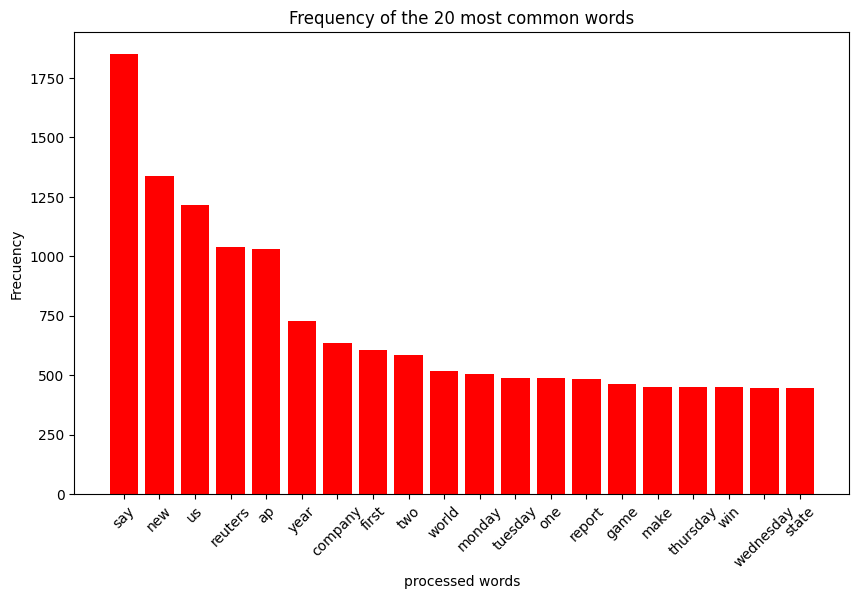

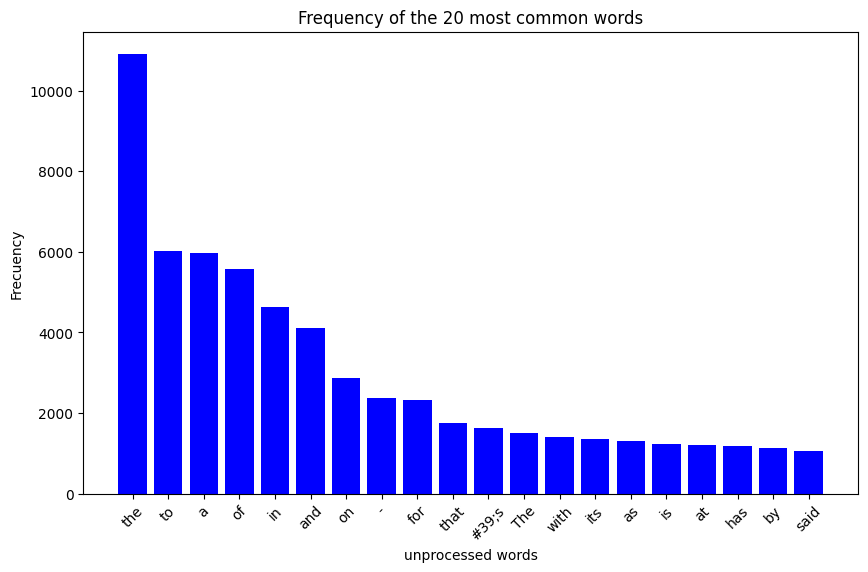

In [ ]:
# We create a chart comparing the 20 most used words before and after processing.
palabras_lem, frecuencia_lem = zip(*frecuencia_palabras_lematizadas.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(palabras_lem, frecuencia_lem, color='red')
plt.xlabel('processed words')
plt.ylabel('Frecuency')
plt.title('Frequency of the 20 most common words')
plt.xticks(rotation=45)
plt.show()

tokens_sin_normalizar = [token for Description in df1['Description'] for token in Description.split()]
frecuencia_palabras_sin_normalizar = Counter(tokens_sin_normalizar)
palabras_sin_norm, frecuencia_sin_norm = zip(*frecuencia_palabras_sin_normalizar.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(palabras_sin_norm, frecuencia_sin_norm, color='blue')
plt.xlabel('unprocessed words')
plt.ylabel('Frecuency')
plt.title('Frequency of the 20 most common words')
plt.xticks(rotation=45)
plt.show()

##Deep learning


Positivas reviews words:
          words  coeficient
356          ap    4.916098
2345       iraq    3.739077
238         afp    3.694526
2468     killed    2.385955
3082    nuclear    2.356538
3453  president    2.298500
3284     people    2.295446
2883   minister    2.227482
3389     police    2.077624
513     baghdad    1.984771

Negatives reviews words:
         words  coeficient
3575   quarter   -1.911243
3916     sales   -1.912032
1432    dollar   -1.999234
788   business   -2.012385
4066    shares   -2.070314
2872   million   -2.077057
3465    prices   -2.099654
1136      corp   -2.428296
3117       oil   -2.457153
1044   company   -3.285297


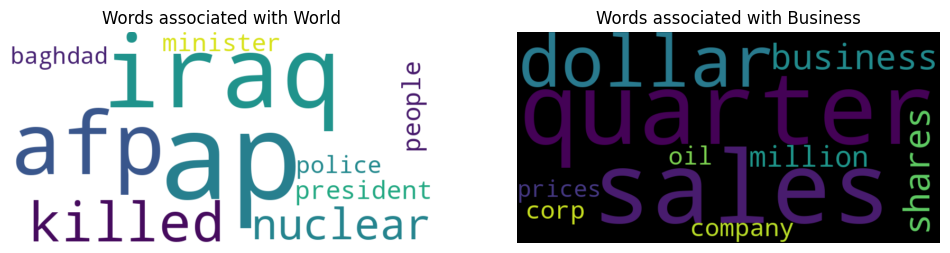

In [ ]:
# We generate word clouds showing the 10 most frequent words in business news and the 10 most frequent words in world news.

df1_bw = df1[df1['Category'].isin(['Business', 'World'])]

# We vectorize the text using TF-IDF.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df1_bw['full_text'])

# We select a prediction model.
model = LogisticRegression(class_weight='balanced')

# We train the model.
model.fit(tfidf_matrix, df1_bw['Category'])

# We store the vectorized words.
words = tfidf_vectorizer.get_feature_names_out()

# We store the word coefficients.
coeficient = model.coef_[0]

# We create a DataFrame with words and their coefficients.
df_coef = pd.DataFrame({'words': words, 'coeficient': coeficient})

# We sort the DataFrame by coefficient values.
df_coef = df_coef.sort_values(by='coeficient', ascending=False)

# We display the results.
print("\nPositivas reviews words:")
print(df_coef.head(10))

print("\nNegatives reviews words:")
print(df_coef.tail(10))


top10 = df_coef.head(10)
top10_ultimo = df_coef.tail(10)

palabras_positivas = dict(zip(top10['words'], top10['coeficient']))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palabras_positivas)

palabras_negativas = dict(zip(top10_ultimo['words'], top10_ultimo['coeficient']))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(palabras_negativas)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Words associated with World')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Words associated with Business')
plt.axis('off')

plt.show()

Distribución sentimient:
sentimient_label
Negativo    1825
Positivo    1527
Neutral      448
Name: count, dtype: int64

Category distribution:
sentimient_label  Negativo  Neutral  Positivo   All
Category                                           
Business               706      265       929  1900
World                 1119      183       598  1900
All                   1825      448      1527  3800

Descriptive statistics:
           count      mean       std     min     25%  50%      75%     max
Category                                                                  
Business  1900.0  0.062872  0.517493 -0.9682 -0.3818  0.0  0.51060  0.9501
World     1900.0 -0.231197  0.591504 -0.9861 -0.8074 -0.3  0.24715  0.9744

Ejample of Business - Positivo:

Títle: US Airways, GE reach accord on airplane leasing and financing
Descriptión: The Wall Street Journal reports that the carrier #39;s largest creditor has agreed to an aircraft leasing and financing deal that would give US Airway...
Sc

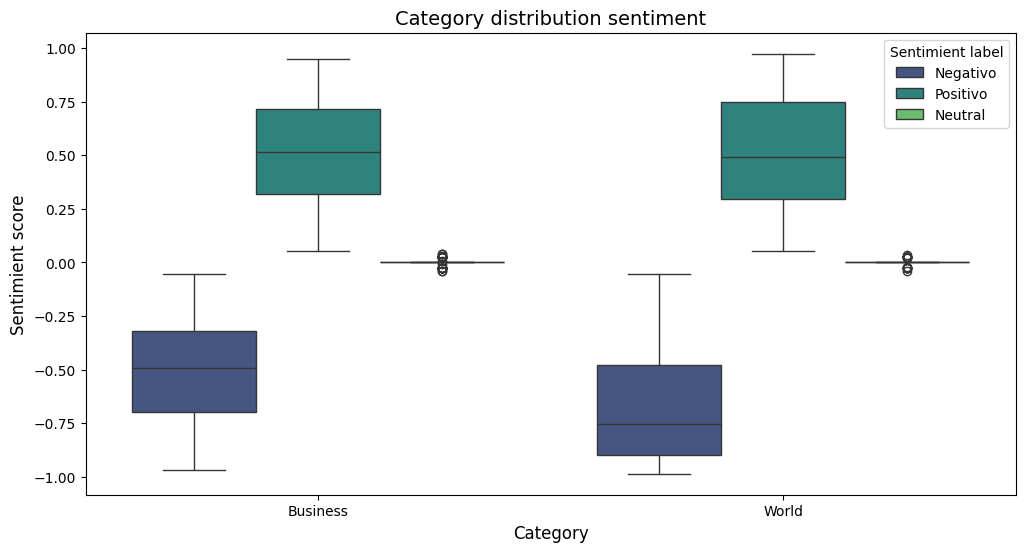

In [ ]:
# We perform sentiment analysis on business and world news.

df_bw = df1[df1['Category'].isin(['Business', 'World'])].copy()

# We define the sentiment analysis function.
sia = SentimentIntensityAnalyzer()

df_bw['sentimient'] = df_bw['full_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# We define the thresholds that determine whether a text is positive, negative, or neutral.
df_bw['sentimient_label'] = df_bw['sentimient'].apply(lambda x: 'Positivo' if x > 0.05 else 'Negativo' if x < -0.05 else 'Neutral')

# We conduct a general analysis.
print("Distribución sentimient:")
print(df_bw['sentimient_label'].value_counts())

# Category report
print("\nCategory distribution:")
print(pd.crosstab(df_bw['Category'], df_bw['sentimient_label'], margins=True))

# We generate sentiment statistics by category.
print("\nDescriptive statistics:")
print(df_bw.groupby('Category')['sentimient'].describe())

# We show representative examples.
def mostrar_ejemplos(category, sentimient, n=5):
    print(f"\nEjample of {category} - {sentimient}:")
    ejemplos = df_bw[(df_bw['Category'] == category) &
                    (df_bw['sentimient_label'] == sentimient)].sample(n)
    for _, row in ejemplos.iterrows():
        print(f"\nTítle: {row['Title']}")
        print(f"Descriptión: {row['Description'][:150]}...")
        print(f"Score: {row['sentimient']:.2f}")

# We display examples.
mostrar_ejemplos('Business', 'Positivo')
mostrar_ejemplos('World', 'Negativo')

# We enhance the visualizations.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='sentimient', data=df_bw, hue='sentimient_label', palette='viridis')
plt.title('Category distribution sentiment', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sentimient score', fontsize=12)
plt.legend(title='Sentimient label')
plt.show()

/tmp/ipython-input-2026601234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_sports['description_str'] = df1_sports['Description'].apply(lambda x: ''.join(x) if isinstance(x, list) else x)


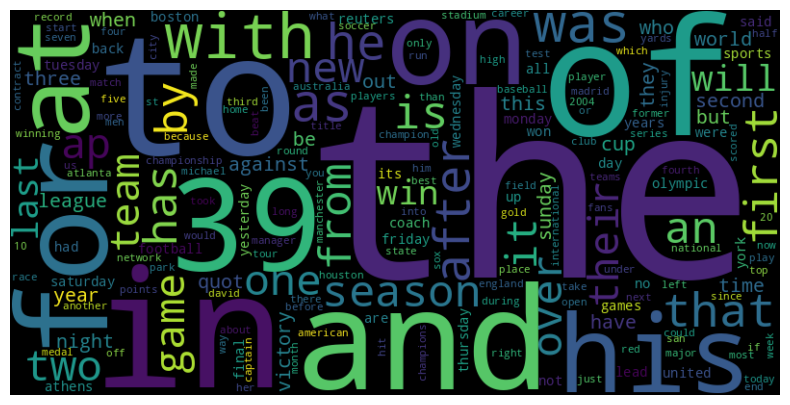

In [ ]:
# We generate a word cloud showing the most frequent words in sports news.

df1_sports = df1[df1['Category'] == 'Sports']
df1_sports['description_str'] = df1_sports['Description'].apply(lambda x: ''.join(x) if isinstance(x, list) else x)

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df1_sports['description_str'])

n_grams = vectorizer.get_feature_names_out()

frecuencias = X.toarray().sum(axis=0)

n_grams_frecuencias = dict(zip(n_grams, frecuencias))

wordcloud = WordCloud(width=800, height=400, background_color='Black').generate_from_frequencies(n_grams_frecuencias)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Parameters best: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Clasificación report for SVM:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       185
           1       0.88      0.76      0.81       195

    accuracy                           0.82       380
   macro avg       0.83      0.82      0.82       380
weighted avg       0.83      0.82      0.82       380


Confusión matriz for SVM


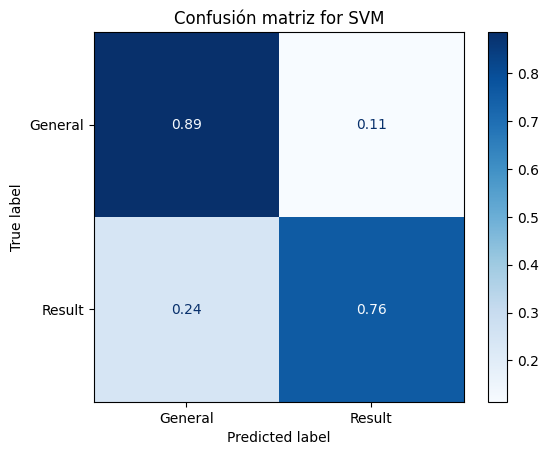


Accurate predictions like general news (0):
                                                                                                                                                                                                                                    full_text  \
182                                                                                                         Pacers Activate Foster From Injured List (AP) AP - The Indiana Pacers activated center Jeff Foster from the injured list Tuesday.   
5781  Bonds MVP Award Provides Sparkle in Tainted Season  NEW YORK (Reuters) - San Francisco Giants slugger Barry  Bonds captured a record seventh MVP award Monday, providing a  sparkling finish to a season tainted by doping allegations.   
6333       Portsmouth Manager Redknapp Resigns to Take Break ; From Soccer Harry Redknapp has quit as manager of English soccer Premiership club Portsmouth and said he wants a complete break ; ; from the game, the club Web site repo

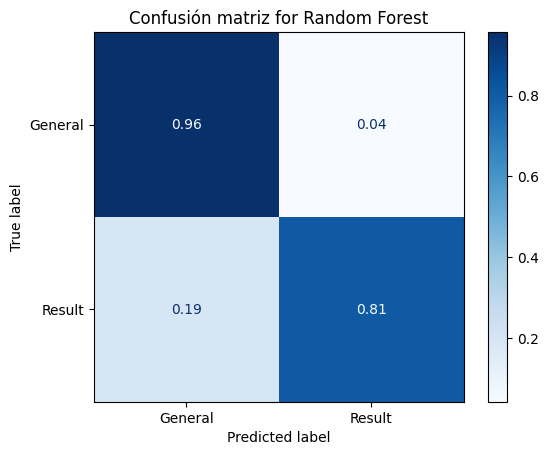


Accurate predictions like general news (0):
                                                                                                                                                                                                                                                                                                                                             full_text  \
376                                                                                                                                                        Cycling: Ulmer  scorching times in secret rides New Zealand  star cyclist, Sarah Ulmer, last week rode under world record time twice in an hour during a secret training session in France.   
5430  Varitek's terms could be tough to meet As much as the Red Sox hope to persuade Jason Varitek to stay in Boston, they face a mighty challenge since Varitek's agent, Scott Boras, said last night the catcher expects to receive a five-year contract with a no-tr

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:59:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Parameters best: {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1.0}

Clasificación report for XGBoost:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       185
           1       1.00      0.84      0.91       195

    accuracy                           0.92       380
   macro avg       0.93      0.92      0.92       380
weighted avg       0.93      0.92      0.92       380


Confusión matriz for XGBoost


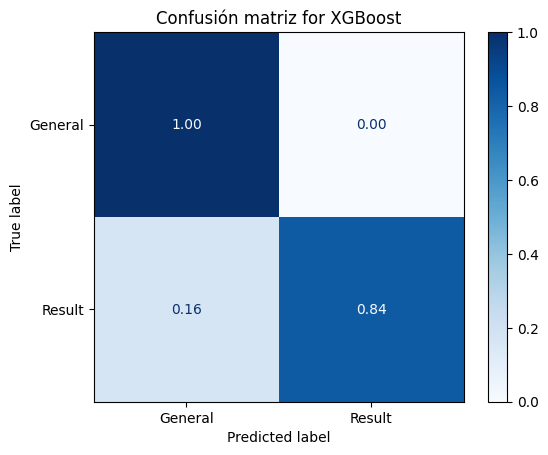


Accurate predictions like general news (0):
                                                                                                                                                                                                                                                                                             full_text  \
7506  Smith says Harmison is the weakest link The South Africa captain Graeme Smith has stirred things up before today  first Test against England by claiming that Steve Harmison, the world  leading bowler, is mentally vulnerable and can be disarmed for the rest of the five-Test series if the    
7174                           Arsenal boss: Flamini, Cesc will do job on Chelsea Arsenal boss Arsene Wenger has dismissed claims today  clash with Chelsea will decide the title race. He said:  quot;The season is not finished but you can say Chelsea are already better than they were last year.   
1202                                                         

In [ ]:
# We analyze whether the article discusses match results or another type of sports news.
keywords = ['win', 'loss', 'score', 'beat', 'defeat', 'championship', 'victory', 'lose', 'trophy', 'final', 'victory against', 'beat by', 'cup']

# We create a dataset containing only sports news.
df_sports = df1[df1['Category'] == 'Sports'].copy()

# We create a result column to determine whether the article is about a match result.
df_sports['is_result'] = df_sports['full_text'].apply(lambda x: 1 if any(word in x.lower() for word in keywords) else 0)

# We vectorize the text.
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2000)

# We create variables X and y to use for training and prediction.
X = vectorizer.fit_transform(df_sports['full_text'])
y = df_sports['is_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We define a function with three different prediction models to determine which performs best.
def evaluar_modelos():
    modelos = {
        'SVM': { 'model': SVC(class_weight='balanced'),
                 'param_grid': {'C': [0.1, 1, 10],
                                'kernel': ['linear', 'rbf', 'poly'],
                                'gamma': ['scale', 'auto', 0.1]}

                 },
        'Random Forest': { 'model': RandomForestClassifier(class_weight='balanced', random_state=42),
                           'param_grid': {'n_estimators': [50, 100, 200],
                                          'max_depth': [None, 10, 20]}
                          },
        'XGBoost': {'model': XGBClassifier(
                scale_pos_weight=np.sum(y == 0)/np.sum(y == 1),
                eval_metric='logloss',
                use_label_encoder=False
            ),
            'param_grid': {
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'subsample': [0.8, 1.0]
            }
        }
    }
    # We print the best results and examples of the values obtained.
    test_indices = y_test.index
    test_df = df_sports.loc[test_indices, ['full_text', 'is_result']].copy()
    for nombre, config in modelos.items():
        grid = GridSearchCV( estimator=config['model'], param_grid=config['param_grid'], cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        print(f"\nParameters best: {grid.best_params_}")

        y_pred = best_model.predict(X_test)
        test_df['prediction'] = y_pred

        print(f"\nClasificación report for {nombre}:")
        print(classification_report(y_test, y_pred))

        print(f"\nConfusión matriz for {nombre}")
        clases = ['General', 'Result']
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
        disp.plot(cmap=plt.cm.Blues, values_format='.2f')
        plt.title(f'Confusión matriz for {nombre}')
        plt.show()

        # We show examples of articles classified as general news, match results, and misclassified predictions.
        print("\nAccurate predictions like general news (0):")
        print(test_df[(test_df['is_result'] == 0) & (test_df['prediction'] == 0)].sample(3)[['full_text', 'is_result', 'prediction']])

        print("\nCorrect prediction as result (1):")
        print(test_df[(test_df['is_result'] == 1) & (test_df['prediction'] == 1)].sample(3)[['full_text', 'is_result', 'prediction']])

        print("\nIncorrect predictions:")
        print(test_df[test_df['is_result'] != test_df['prediction']].sample(3)[['full_text', 'is_result', 'prediction']])

evaluar_modelos()


Fitting 5 folds for each of 4 candidates, totalling 20 fits

Clasificacion Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       377
           1       1.00      0.33      0.50         3

    accuracy                           0.99       380
   macro avg       1.00      0.67      0.75       380
weighted avg       0.99      0.99      0.99       380



ValueError: Unknown format code 'd' for object of type 'float'

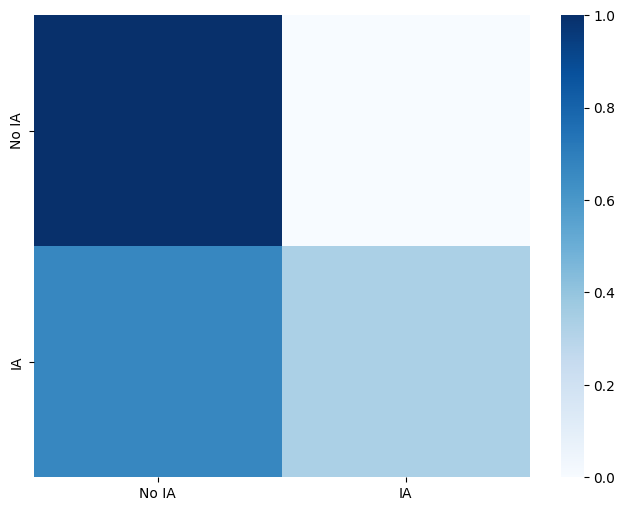

In [ ]:
# We aim to distinguish whether sci/tech news articles are about artificial intelligence or not.
ia_keywords = {'artificial intelligence', 'machine learning', 'deep learning',
               'neural network', 'neural networks', 'ai system', 'ai model',
               'natural language processing', 'computer vision', 'generative ai',
               'chatgpt', 'llm', 'large language model', 'autonomous system',
               'reinforcement learning', 'algorithmic learning', 'AI'}

# We create a copy of the dataset containing only sci/tech news.
df_scitech = df1[df1['Category'] == 'Sci/Tech'].copy()

# We check whether the article contains any keywords listed in ia_keywords.
df_scitech['is_ia'] = df_scitech['full_text'].apply(lambda x: 1 if any(word in x.lower() for word in ia_keywords) else 0)

# We vectorize the text using TF-IDF.
vectorizer = TfidfVectorizer(max_features=1500,
                             stop_words='english',
                             ngram_range=(1,3,))

X = vectorizer.fit_transform(df_scitech['full_text'])

y = df_scitech['is_ia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

param_grid = {'n_estimators': [100, 200],
              'class_weight': ['balanced', None]}

# We apply a prediction model with tuned parameters.
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# We use the best-performing data.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# We display a classification report
print("\nClasificacion Report:")
print(classification_report(y_test, y_pred))

# We generate a confusion matrix to visualize the results.
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No IA', 'IA'], yticklabels=['No IA', 'IA'])
plt.title('Confusión Matriz - AI detection or not AI')
plt.xlabel('Predictión')
plt.ylabel('Real value')
plt.show()

#Conclusion

##We can conclude that both deep learning approaches used in this project performed effectively and delivered strong results. Among the techniques applied, we leaned toward the TF-IDF method, and the prediction model that achieved the highest accuracy was XGBoost.
##In the analysis of whether business or world news articles carried a positive or negative tone, we used the Sentiment Intensity Analyzer, along with a custom function to classify each text based on its sentiment score.
##For the sports category, we applied the TF-IDF methodology and compared three different prediction models to determine which yielded the best performance. In this case, XGBoost again stood out, achieving an accuracy of 0.92.
##In the final case study, we aimed to identify whether sci/tech news articles were related to artificial intelligence. To do this, we vectorized the text and applied a Random Forest Classifier, enhanced with GridSearchCV for hyperparameter tuning. This approach delivered near-perfect results, with an accuracy of 0.99.

##🔮 Future Outlook
##If we scale this project to a larger dataset with more news articles, we’ll need to carefully evaluate model performance and, if necessary, adjust parameters or explore alternative models to maintain high accuracy levels.
